In [62]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
flood_policies = pd.read_csv("nfip-flood-policies.csv", header=0, nrows = 10000000, low_memory = False, memory_map = True)
# https://www.kaggle.com/datasets/lynma01/femas-national-flood-insurance-policy-database
flood_policies.head()

,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,...,primaryresidenceindicator,propertystate,reportedzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,NaN,NaN,2.0,NaN,3.301304e+10,N,N,33013.0,0.00,0,...,Y,NH,3278.0,7,R,WARNER,NaN,250000,100000,375
1,NaN,NaN,0.0,NaN,2.206304e+10,N,N,22063.0,0.05,1,...,Y,LA,70726.0,1,R,DENHAM SPRINGS,NaN,16400,8800,280
2,NaN,NaN,0.0,NaN,4.505106e+10,N,N,45051.0,0.00,0,...,Y,SC,29579.0,7,R,MYRTLE BEACH,NaN,250000,100000,335
3,NaN,519.0,2.0,2016-04-01,1.055001e+09,N,N,1055.0,0.00,1,...,Y,AL,35901.0,2,R,GADSDEN,NaN,174900,21000,916
4,NaN,7.0,0.0,NaN,1.208600e+10,N,N,12086.0,0.00,0,...,Y,FL,33160.0,1,R,GOLDEN BEACH,NaN,250000,100000,1288


In [4]:
flood_policies.isna().sum()

agriculturestructureindicator         9999890
basefloodelevation                    6615608
basementenclosurecrawlspacetype             9
cancellationdateoffloodpolicy         8362620
censustract                             55298
condominiumindicator                        2
construction                                2
countycode                               2569
crsdiscount                                 0
deductibleamountinbuildingcoverage     126157
deductibleamountincontentscoverage    1054950
elevatedbuildingindicator                   3
elevationcertificateindicator         6780448
elevationdifference                         0
federalpolicyfee                            0
floodzone                               26905
hfiaasurcharge                              0
houseofworshipindicator               9999962
latitude                                 8708
locationofcontents                    2995245
longitude                                8708
lowestadjacentgrade               

In [5]:
df = flood_policies[['floodzone','latitude','longitude','propertystate','reportedzipcode','reportedcity',
                     'smallbusinessindicatorbuilding', 'obstructiontype', 
                     'nonprofitindicator', 'houseofworshipindicator', 'agriculturestructureindicator',
                     'cancellationdateoffloodpolicy','originalnbdate','policyeffectivedate','policyterminationdate',
                     'totalbuildinginsurancecoverage','totalcontentsinsurancecoverage','totalinsurancepremiumofthepolicy']]

In [6]:
mask = df[['smallbusinessindicatorbuilding', 'obstructiontype', 
                     'nonprofitindicator', 'houseofworshipindicator', 'agriculturestructureindicator',
                     'cancellationdateoffloodpolicy']].isna()

In [7]:
df[mask] = "Unknown"

C:\Users\Hobbs\AppData\Local\Temp\ipykernel_6824\247680975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[mask] = "Unknown"
C:\Users\Hobbs\AppData\Local\Temp\ipykernel_6824\247680975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[mask] = "Unknown"


In [8]:
df.isna().sum()

floodzone                           26905
latitude                             8708
longitude                            8708
propertystate                           0
reportedzipcode                         2
reportedcity                            2
smallbusinessindicatorbuilding          0
obstructiontype                         0
nonprofitindicator                      0
houseofworshipindicator                 0
agriculturestructureindicator           0
cancellationdateoffloodpolicy           0
originalnbdate                          0
policyeffectivedate                     0
policyterminationdate                   0
totalbuildinginsurancecoverage          0
totalcontentsinsurancecoverage          0
totalinsurancepremiumofthepolicy        0
dtype: int64

In [9]:
df.dropna()

,floodzone,latitude,longitude,propertystate,reportedzipcode,reportedcity,smallbusinessindicatorbuilding,obstructiontype,nonprofitindicator,houseofworshipindicator,agriculturestructureindicator,cancellationdateoffloodpolicy,originalnbdate,policyeffectivedate,policyterminationdate,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,X,43.3,-71.8,NH,3278.0,WARNER,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2008-08-19,2009-08-19,2010-08-19,250000,100000,375
1,AE,30.5,-91.0,LA,70726.0,DENHAM SPRINGS,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1997-10-04,2009-10-04,2010-10-04,16400,8800,280
2,X,33.7,-79.0,SC,29579.0,MYRTLE BEACH,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2005-08-13,2009-08-13,2010-08-13,250000,100000,335
3,AE,34.0,-86.0,AL,35901.0,GADSDEN,Unknown,50,Unknown,Unknown,Unknown,2016-04-01,2006-04-14,2009-04-14,2010-04-14,174900,21000,916
4,A10,26.0,-80.1,FL,33160.0,GOLDEN BEACH,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1996-04-04,2009-04-04,2010-04-04,250000,100000,1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,AE,39.6,-74.2,NJ,8008.0,BEACH HAVEN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2000-05-27,2011-09-21,2011-10-20,250000,32600,1578
9999996,AE,39.6,-74.2,NJ,8008.0,BEACH HAVEN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2000-05-27,2011-10-20,2012-05-27,250000,32600,1578
9999997,A,39.9,-75.2,PA,19153.0,PHILADELPHIA,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2000-08-02,2011-08-02,2012-08-02,200000,0,1917
9999998,C,30.4,-90.1,LA,70471.0,MANDEVILLE,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2011-04-26,2011-04-26,2012-04-26,250000,100000,345


In [10]:
state_count = df['propertystate'].value_counts()
state_count

propertystate
FL    3150934
TX    1386924
LA    1041221
CA     572803
NJ     396049
SC     320522
NY     319191
NC     268268
VA     219725
GA     201526
MS     161513
PA     141428
WA     116946
PR     106171
MD      97656
IL      94742
MA      94671
AL      91417
OH      85360
AZ      71778
IN      71414
OR      69366
CT      67158
TN      61376
MO      56062
MI      54844
KY      52239
WV      47954
AR      42368
DE      41661
HI      39126
NM      38037
CO      36732
OK      36597
WI      34755
IA      34542
NV      31604
RI      30911
ND      28399
KS      28049
NE      27695
MN      24919
ME      18108
NH      16099
ID      14402
SD      11595
MT      10427
VT       7765
UT       7575
AK       6368
WY       5812
VI       3750
DC       1956
AS        900
GU        588
CM          2
Name: count, dtype: int64

In [14]:
df_michigan = df[df['propertystate'] == 'MI']

In [21]:
df_michigan['reportedzipcode'].astype(int)
df_michigan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54844 entries, 420 to 9999866
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   floodzone                         54595 non-null  object 
 1   latitude                          54784 non-null  float64
 2   longitude                         54784 non-null  float64
 3   propertystate                     54844 non-null  object 
 4   reportedzipcode                   54844 non-null  int64  
 5   reportedcity                      54844 non-null  object 
 6   smallbusinessindicatorbuilding    54844 non-null  object 
 7   obstructiontype                   54844 non-null  object 
 8   nonprofitindicator                54844 non-null  object 
 9   houseofworshipindicator           54844 non-null  object 
 10  agriculturestructureindicator     54844 non-null  object 
 11  cancellationdateoffloodpolicy     54844 non-null  object 
 12  origi

In [37]:
df_michigan = df_michigan.dropna()

In [70]:
mask = df_michigan['floodzone'].str.contains('^A')
df_michigan['High_floodzone'] = False
df_michigan.loc[mask, 'High_floodzone'] = True
mask = df_michigan['floodzone'].str.contains('^V')
df_michigan['Coastal_High_floodzone'] = False
df_michigan.loc[mask, 'Coastal_High_floodzone'] = True
mask = df_michigan['floodzone'].str.contains('^[BCX]')
df_michigan['Low_Moderate_floodzone'] = False
df_michigan.loc[mask, 'Low_Moderate_floodzone'] = True
mask = df_michigan['floodzone'].str.contains('^D')
df_michigan['Undetermined_floodzone'] = False
df_michigan.loc[mask, 'Undetermined_floodzone'] = True
df_michigan.head()

C:\Users\Hobbs\AppData\Local\Temp\ipykernel_6824\2021898080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_michigan['High_floodzone'] = False
C:\Users\Hobbs\AppData\Local\Temp\ipykernel_6824\2021898080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_michigan['Coastal_High_floodzone'] = False
C:\Users\Hobbs\AppData\Local\Temp\ipykernel_6824\2021898080.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,floodzone,latitude,longitude,propertystate,reportedzipcode,reportedcity,smallbusinessindicatorbuilding,obstructiontype,nonprofitindicator,houseofworshipindicator,...,originalnbdate,policyeffectivedate,policyterminationdate,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,High_floodzone,Coastal_High_floodzone,Low_Moderate_floodzone,Undetermined_floodzone
420,C,43.1,-86.2,MI,49456,SPRING LAKE,Unknown,Unknown,Unknown,Unknown,...,2007-09-06,2009-09-06,2010-09-06,125000,50000,294,False,False,True,False
636,X,42.3,-83.3,MI,48125,DEARBORN HGTS,Unknown,Unknown,Unknown,Unknown,...,1999-08-18,2009-01-12,2010-01-12,172700,0,585,False,False,True,False
764,C,42.1,-86.4,MI,49085,SAINT JOSEPH,Unknown,10,Unknown,Unknown,...,1997-06-16,2009-06-16,2010-06-16,150000,60000,283,False,False,True,False
1161,AE,42.8,-86.2,MI,49434,MACATAWA,Unknown,Unknown,Unknown,Unknown,...,2007-07-20,2009-07-20,2010-07-20,500000,0,2500,True,False,False,False
1349,AE,42.3,-83.8,MI,48103,ANN ARBOR,Unknown,Unknown,Unknown,Unknown,...,2008-04-08,2009-04-08,2010-04-08,70000,0,638,True,False,False,False


Text(0.5, 1.0, 'Count of Properties in Each Flood Zone')

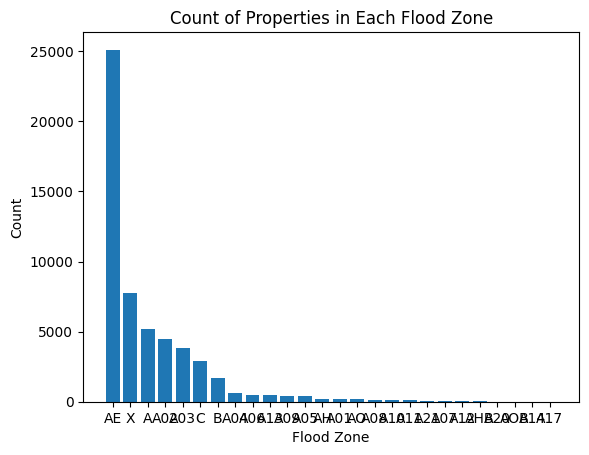

In [ ]:
floodzone_counts = df_michigan['floodzone'].value_counts()
labels = floodzone_counts.index
heights = floodzone_counts.values

plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone")